# Cvičení ke kapitole Vizualizace

## [1] Házení kostkami

Mějme dvě hrací kostky, kterými vždy hodíme najednou a zaznamenáme součet bodů. 

Stáhněte si textový soubor [kostky.csv](https://kodim.cz/czechitas/progr2-python/python-pro-data-1/vizualizace/excs/hazeni-kostkami/assets/kostky.csv), který obsahuje 1.000 takových nezávislých hodů.



In [1]:
import requests

r = requests.get("https://kodim.cz/cms/assets/kurzy/python-data-1/python-pro-data-1/vizualizace/excs/excs%3Ehazeni-kostkami/kostky.csv")
open("kostky.csv", "wb").write(r.content)

2180

Načtěte tato data do tabulky a zobrazte histogram hodů. 

Zvolte vhodné rozložení přihrádek a zodpovězte následující dotazy:

1. Jaká je nejčastější hodnota, která na dvou kostkách padne?
2. Je větší šance, že padne hodnota 12 než že padne hodnota 2?

array([[<AxesSubplot:title={'center':'hodnota'}>]], dtype=object)

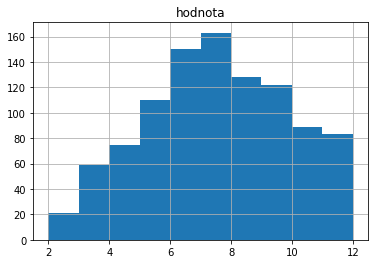

In [2]:
import pandas
import matplotlib.pyplot as plt

kostky = pandas.read_csv("kostky.csv")
kostky.hist()

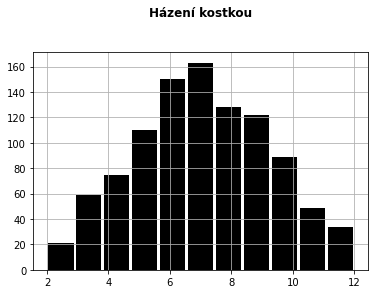

In [3]:
kostky.hist(
            # bins=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
            bins = 11,
            range = (2,12),
            rwidth = 0.9,
            facecolor = "#000000", ## RGB
            )

plt.title("Házení kostkou\n\n",
          fontweight ="bold")

plt.show()

## [2] Call centrum

V souboru callcentrum.txt najdete několik tisíc záznamů pro call centrum, které udávají časy mezi jednotlivými příchozími hovory v minutách a vteřinách. 

Načtěte tato data do série v Pythonu. 


In [19]:
import requests

r = requests.get("https://kodim.cz/cms/assets/kurzy/python-data-1/python-pro-data-1/vizualizace/excs/excs%3Ecall-centrum/callcentrum.csv")
open("callcentrum.csv", "wb").write(r.content)

callcentrum = pandas.read_csv("callcentrum.csv")
callcentrum = callcentrum["hodnota"].str.split(':', expand=True).astype(int)
callcentrum.rename(columns={0:'minutes', 1:'seconds'},inplace=True)

Časy převeďte na vteřiny a zobrazte jejich histogram a boxplot. 

Co lze z těchto dvou grafů vyčíst?

K převodu na vteřiny můžeš použít metodu `str.split()`. Pomocí ní rozdělíš hodnoty minut a vteřit do samostatných sloupců. 

Pomocí metody `astype(int)` převedeš hodnoty na čísla. 

Poté pomocí počítaných sloupců můžeš spočítat celkový počet vteřin.

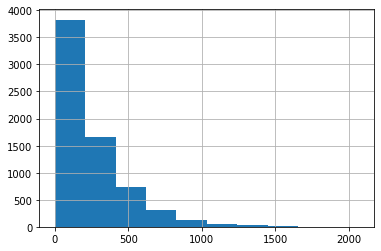

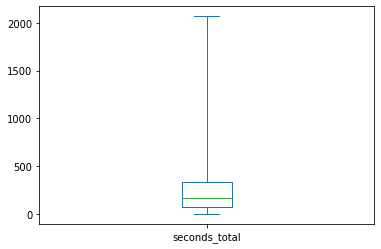

In [20]:
callcentrum["seconds_total"] = callcentrum["minutes"] * 60 + callcentrum["seconds"]

## Histogram
callcentrum["seconds_total"].hist()
plt.show()

# Boxplot
callcentrum["seconds_total"].plot(kind='box', whis=[0, 100])
plt.show()

## [3] Hurá na hory

Následující data obsahují úhrnné množství sněhu (v cm) napadlé za každý rok pro posledních 50 let pro dva lyžarské resorty. 

První sloupec je rok, druhý jsou data pro resort Hora šílenství, třetí jsou data pro resort Prašné údolí.

In [7]:
snih = [
    [1968, 480, 351],
    [1969, 462, 663],
    [1970, 443, 490],
    [1971, 518, 444],
    [1972, 537, 420],
    [1973, 446, 941],
    [1974, 446, 691],
    [1975, 450, 477],
    [1976, 356, 395],
    [1977, 381, 652],
    [1978, 345, 525],
    [1979, 430, 762],
    [1980, 266, 316],
    [1981, 533, 781],
    [1982, 471, 769],
    [1983, 407, 801],
    [1984, 526, 633],
    [1985, 391, 488],
    [1986, 361, 624],
    [1987, 470, 471],
    [1988, 506, 514],
    [1989, 333, 208],
    [1990, 462, 909],
    [1991, 438, 443],
    [1992, 364, 488],
    [1993, 452, 579],
    [1994, 484, 519],
    [1995, 460, 809],
    [1996, 465, 682],
    [1997, 431, 814],
    [1998, 463, 595],
    [1999, 460, 512],
    [2000, 503, 750],
    [2001, 462, 951],
    [2002, 429, 413],
    [2003, 405, 738],
    [2004, 477, 777],
    [2005, 385, 316],
    [2006, 368, 417],
    [2007, 513, 635],
    [2008, 448, 689],
    [2009, 525, 443],
    [2010, 427, 225],
    [2011, 460, 618],
    [2012, 417, 742],
    [2013, 517, 247],
    [2014, 466, 552],
    [2015, 523, 441],
    [2016, 422, 690],
    [2017, 420, 699]
]
snihdf = pandas.DataFrame(snih, columns=['rok', 'hora', 'udoli'])
snihdf = snihdf.set_index('rok')


Použijte krabicový graf k porovnání sněhových srážek v obou resortech. 

Do kterého byste se vypravili příští rok na lyže a proč?



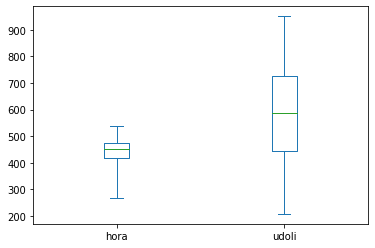

In [21]:
snihdf.plot(kind='box', whis=[0, 100])
plt.show()